In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Grocery_Inventory.csv', encoding = 'unicode_escape')

In [4]:
df.shape

(990, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product_Name             990 non-null    object
 1   Catagory                 989 non-null    object
 2   Supplier_Name            990 non-null    object
 3   Warehouse_Location       990 non-null    object
 4   Status                   990 non-null    object
 5   Product_ID               990 non-null    object
 6   Supplier_ID              990 non-null    object
 7   Date_Received            990 non-null    object
 8   Last_Order_Date          990 non-null    object
 9   Expiration_Date          990 non-null    object
 10  Stock_Quantity           990 non-null    int64 
 11  Reorder_Level            990 non-null    int64 
 12  Reorder_Quantity         990 non-null    int64 
 13  Unit_Price               990 non-null    object
 14  Sales_Volume             990 non-null    i

In [6]:
df

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage
0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,03-01-2024,01-06-2025,1/31/2025,46,64,17,$4.60,96,55,1.96%
1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,04-01-2024,5/19/2024,06-11-2024,51,87,86,$2.00,24,83,0.91%
2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,04-01-2024,12/21/2024,04-08-2024,38,67,66,$12.00,35,24,1.36%
3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,05-01-2024,12-12-2024,9/26/2024,51,60,98,$1.50,44,95,1.36%
4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,05-01-2024,7/28/2024,5/20/2024,27,22,89,$7.00,91,77,2.17%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Parmesan Cheese,Dairy,Yakidoo,0 Fordem Place,Backordered,67-984-5368,39-714-7313,9/27/2024,10-04-2024,7/28/2024,52,56,34,$12.00,31,69,24%
986,Raw Sugar,Grains & Pulses,Flipopia,365 Vera Terrace,Active,44-782-1395,54-132-9762,9/29/2024,6/26/2024,11/17/2024,72,72,68,$1.50,39,78,-123%
987,Cabbage,Fruits & Vegetables,Topdrive,43 Washington Street,Discontinued,75-927-9108,27-406-7972,9/29/2024,6/17/2024,07-02-2024,24,32,17,$1.00,55,72,-100%
988,Green Beans,Fruits & Vegetables,Gigazoom,37 Browning Trail,Discontinued,78-614-4402,51-014-4287,9/30/2024,2/14/2025,4/25/2024,81,99,28,$2.00,20,85,-31%


Data Cleaning

In [7]:
# Convert 'Unit_Price' to numeric
df['Unit_Price'] = df['Unit_Price'].str.replace('$', '', regex=False).astype(float)

In [8]:
# Convert 'percentage' to float
df['percentage'] = df['percentage'].str.replace('%', '', regex=False).astype(float) / 100

In [12]:
def parse_mixed_dates(x):
    try:
        if "/" in x:  # format like 3/17/2024 → MM/DD/YYYY
            return pd.to_datetime(x, format="%m/%d/%Y", errors="coerce")
        elif "-" in x:  # format like 07-01-2024 → DD-MM-YYYY
            return pd.to_datetime(x, format="%d-%m-%Y", errors="coerce")
    except:
        return pd.NaT  # fallback if nothing works

df['Date_Received'] = df['Date_Received'].astype(str).apply(parse_mixed_dates)
df['Last_Order_Date'] = df['Last_Order_Date'].astype(str).apply(parse_mixed_dates)
df['Expiration_Date'] = df['Expiration_Date'].astype(str).apply(parse_mixed_dates)

In [11]:
# Handle the missing value in 'Catagory' by filling it with the mode
df['Catagory'].fillna(df['Catagory'].mode()[0])

,Catagory
0,Fruits & Vegetables
1,Oils & Fats
2,Dairy
3,Fruits & Vegetables
4,Fruits & Vegetables
...,...
985,Dairy
986,Grains & Pulses
987,Fruits & Vegetables
988,Fruits & Vegetables


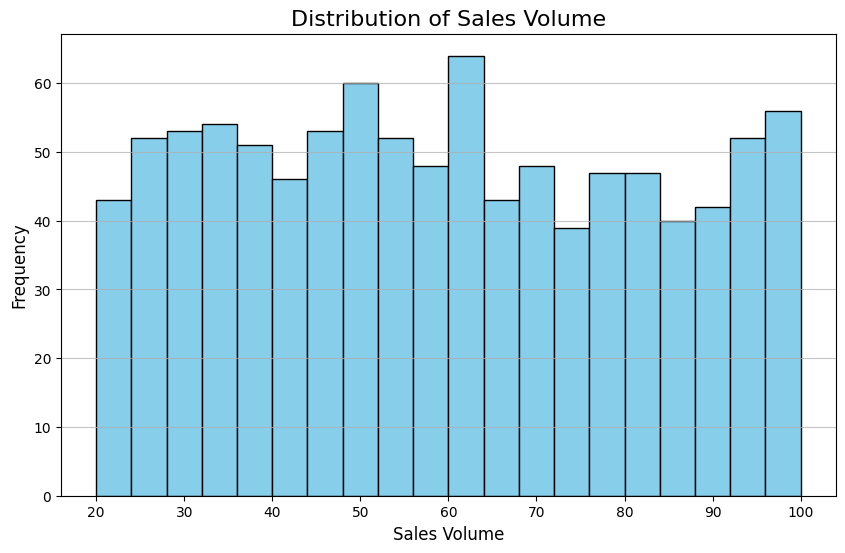

In [14]:
# Distribution of Sales Volume
plt.figure(figsize=(10, 6))
plt.hist(df['Sales_Volume'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales Volume', fontsize=16)
plt.xlabel('Sales Volume', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

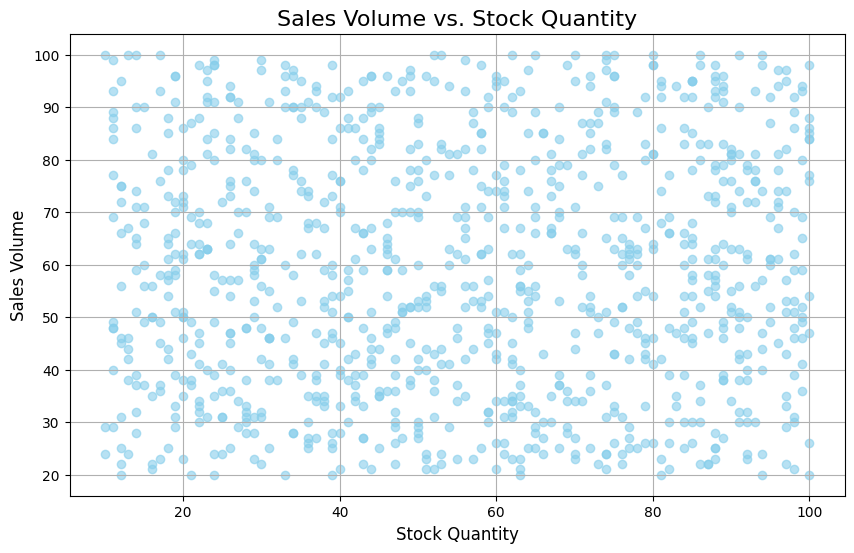

In [15]:
# Scatter plot of Sales_Volume vs. Stock_Quantity
plt.figure(figsize=(10, 6))
plt.scatter(df['Stock_Quantity'], df['Sales_Volume'], alpha=0.6, color='skyblue')
plt.title('Sales Volume vs. Stock Quantity', fontsize=16)
plt.xlabel('Stock Quantity', fontsize=12)
plt.ylabel('Sales Volume', fontsize=12)
plt.grid(True)
plt.show()

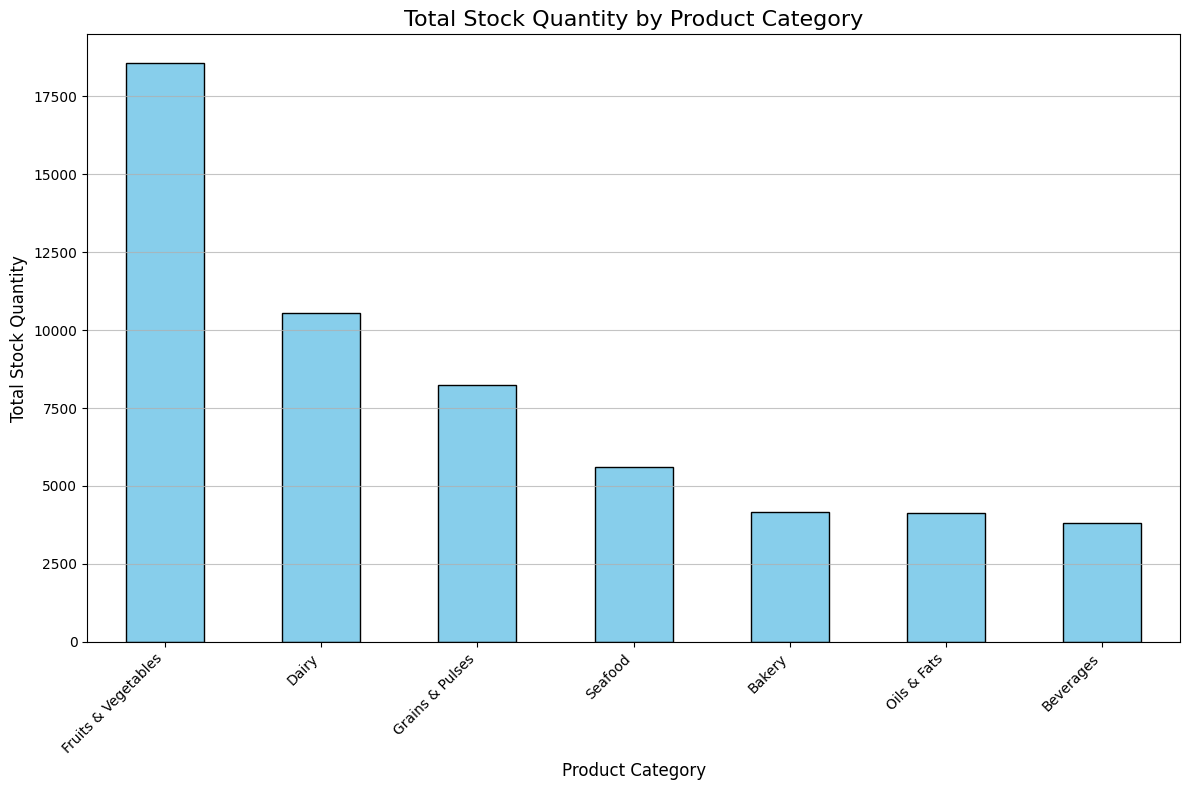

In [16]:
# Bar Chart of total Stock Quantity by Category
total_stock_by_category = df.groupby('Catagory')['Stock_Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
total_stock_by_category.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Stock Quantity by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Stock Quantity', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

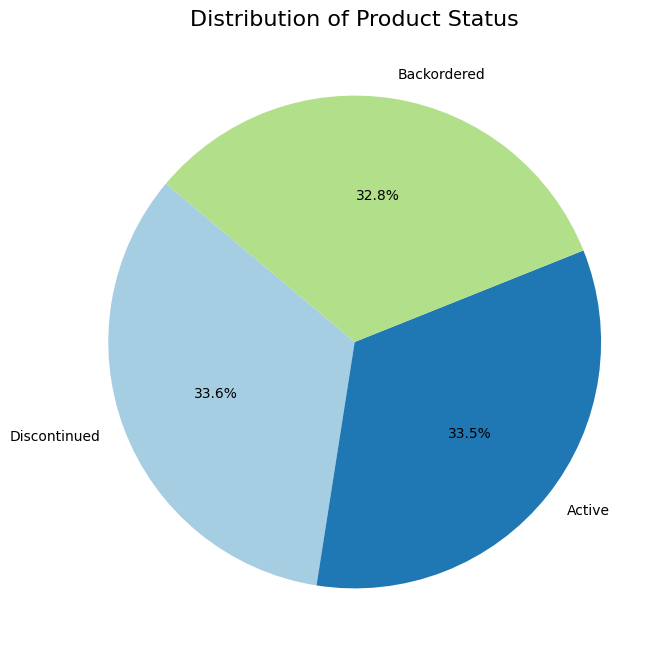

In [18]:
# Pie Chart of Status
status_counts = df['Status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Product Status', fontsize=16)
plt.ylabel('')
plt.show()

/tmp/ipython-input-2967247466.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales_Volume'].resample('M').sum()


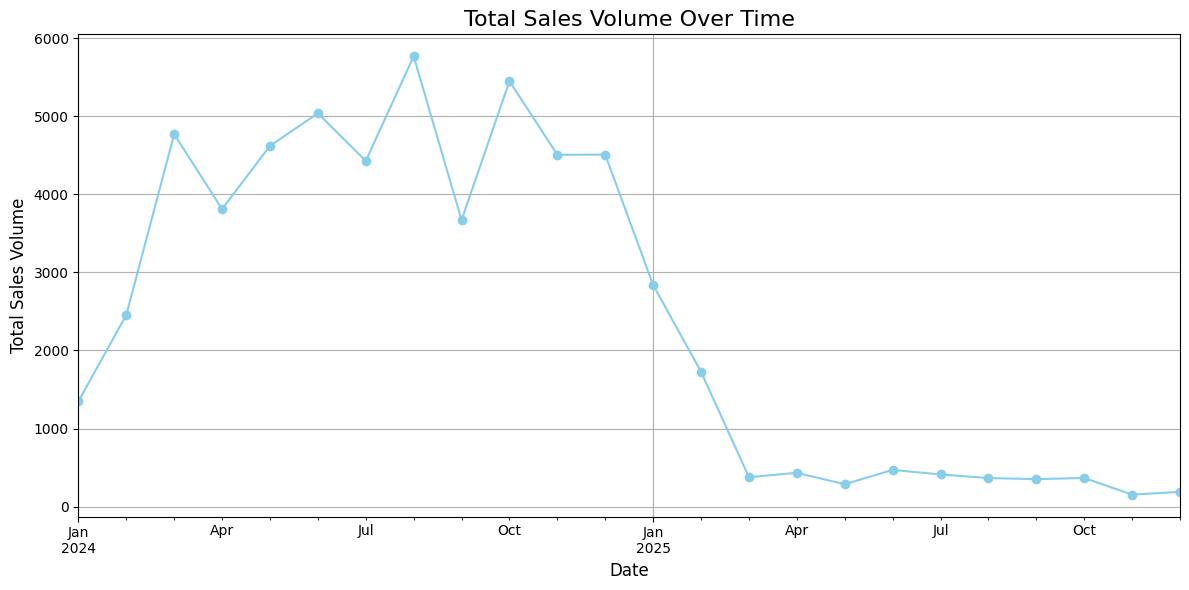

In [19]:
# Aggregate total Sales_Volume over time (by month)
df.set_index('Date_Received', inplace=True)
monthly_sales = df['Sales_Volume'].resample('M').sum()

# Line Chart of total Sales_Volume over time
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='skyblue')
plt.title('Total Sales Volume Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales Volume', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()